In [63]:
from tools import load
import numpy as np
import re
import math
import matplotlib.pyplot as plt

In [64]:
data = load(line_splitter="-")

In [65]:
import networkx as nx

In [66]:
G = nx.Graph() 

In [67]:
G.add_edges_from(data)

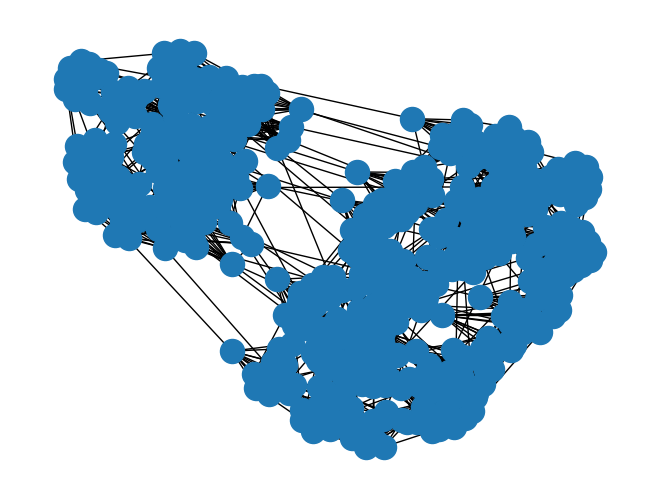

In [68]:
nx.draw(G)

In [69]:
def all_extensions(current_G, G, succ=True):
    
    extensions = []
    for node in current_G:

        # we all connected node we add a extended graph.
        [extensions.append(x) for x in list(G.neighbors(node)) if x not in current_G]

    return [current_G + [ex] for ex in set(extensions)]


In [70]:
def get_all_subgraphs(sub_G, n_vars=5):
    # Samples all subgraphs possible from sub_G
    full_stack = []
    for start_node in list(sub_G.nodes):
        no_graphs = False
        # graph stack holds all possible current extensions from the start node onwards.
        graph_stack = [[start_node]]
        for step in range(n_vars - 1):
            # checks for all possible extensions for all current subgraphs in the graph stac
            res = [
                item
                for sublist in [all_extensions(g, sub_G) for g in graph_stack]
                for item in sublist
            ]
            if len(res) > 0:
                # extensions
                graph_stack = res
            else:
                no_graphs = True
        if not no_graphs:
            full_stack.append(graph_stack)
    # There might be many double graphs so we remove them by
    # sorting ids and removing doubles via set.
    full_stack = list(
        set(
            tuple(sorted(i))
            for i in [item for sublist in full_stack for item in sublist]
        )
    )
    return full_stack

In [71]:
combo = get_all_subgraphs(G, 3)

In [82]:
def subselect(combo, n=3):
    res1 = []
    for x in combo: 
        if len(G.subgraph(x).edges) == n: 
            res1.append(x)
    final = []
    for item in res1: 
        for p in item: 
            if p[0] == "t":
                final.append(item)
                break
    return final

In [83]:
len(subselect(combo))

6797

In [ ]:
#bron_kerbosch
#https://www.altcademy.com/blog/discover-the-largest-complete-subgraph/ 
def bron_kerbosch(graph, r=set(), p=None, x=set()):
    if p is None:
        p = set(graph.keys())

    if not p and not x:
        yield r
    else:
        u = next(iter(p | x))  # Choose a pivot vertex
        for v in p - graph[u]:
            yield from bron_kerbosch(graph, r | {v}, p & graph[v], x & graph[v])
            p.remove(v)
            x.add(v)

def find_largest_complete_subgraph(graph):
    cliques = list(bron_kerbosch(graph))
    return max(cliques, key=len)


In [114]:
#B 
combo = get_all_subgraphs(G, 3)

In [115]:
combo = subselect(combo,n=3)

In [116]:
len(combo)

1163

In [119]:
potential = []
for n,x in enumerate(combo):
    for m,y in enumerate(combo):
        if x == y:
            pass
        else:
            if len(G.subgraph(x + y).edges) == 15:
                potential.append(x+y)

In [121]:
len(potential)

12096

In [96]:
x


('pj', 'sa', 'to', 'yy')

In [ ]:
#

[('dh', 'is', 'ow', 'ze'),
 ('jx', 'qk', 'ww', 'za'),
 ('sh', 'tk', 'wv', 'zp'),
 ('ao', 'rk', 'tb', 'vi'),
 ('cc', 'ku', 'si', 'wt'),
 ('pe', 'uu', 'wc', 'zn'),
 ('nt', 'sw', 'wb', 'yk'),
 ('gq', 'oq', 'pq', 'ws'),
 ('dn', 'ps', 'ua', 'uj'),
 ('ez', 'fe', 'pj', 'tv'),
 ('hb', 'qw', 'rq', 'sx'),
 ('km', 'oq', 'pq', 'vb'),
 ('gh', 'lk', 'nd', 'nx'),
 ('cz', 'ep', 'lo', 'px'),
 ('da', 'hb', 'oh', 'rz'),
 ('ch', 'pk', 'px', 'qk'),
 ('ch', 'ft', 'jx', 'lo'),
 ('fl', 'ft', 'hz', 'on'),
 ('il', 'nz', 'qe', 'xr'),
 ('ck', 'jq', 'ny', 'wd'),
 ('dg', 'dl', 'kb', 'lw'),
 ('cd', 'ga', 'iv', 'mx'),
 ('cd', 'pw', 'yt', 'zg'),
 ('nk', 'rl', 'sz', 'th'),
 ('ar', 'xw', 'zr', 'zy'),
 ('cm', 'nf', 'pg', 'rc'),
 ('bq', 'ej', 'nk', 'xn'),
 ('ju', 'lh', 'ra', 'wk'),
 ('fj', 'jo', 'ls', 'wg'),
 ('dt', 'rd', 'vu', 'xd'),
 ('fi', 'gx', 'kp', 'up'),
 ('ap', 'jl', 'op', 'yd'),
 ('ms', 'ox', 'ud', 'zm'),
 ('fa', 'fs', 'rp', 'wd'),
 ('aw', 'ft', 'on', 'zf'),
 ('cr', 'do', 'fi', 'ij'),
 ('bs', 'dp', 'gy', 'pu'),
 